In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.metrics import r2_score
#source: https://pythondata.com/forecasting-with-random-forests/

In [2]:
df = pd.read_csv('../data/csv/Gold_DataRF.csv')
df = df[['Gold_Settle', 'Money Manager Shorts', 'Money Manager Longs', 'USD_Settle']]
df.head()

,Gold_Settle,Money Manager Shorts,Money Manager Longs,USD_Settle
0,602.80,30916,103211,85.7620
1,570.50,30963,94632,86.2112
2,584.18,32287,91042,86.0000
3,594.40,30452,92545,85.2640
4,634.00,27624,104213,85.0220


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D09F477C18>,
      dtype=object)

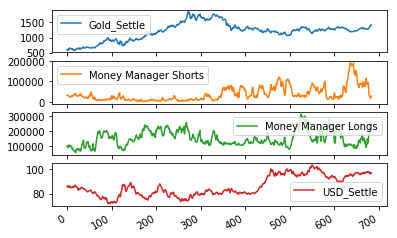

In [3]:
df.plot(subplots=True)

In [4]:
#Training and testing the data
X = (df['USD_Settle'])
y = (df['Gold_Settle'])
#taking the first 300 datapoints to train the random forest
X_train = X[X.index < 384]
y_train = y[y.index < 384]   
#next, will test it on the remaining 300
X_test = X[X.index >= 384]
y_test = y[y.index >= 384] 

In [18]:
# building out Random Forest model
RF_Model = RandomForestRegressor(n_estimators=100,
                                 max_features=1, oob_score=True)
 
# let's get the labels and features in order to run our 
# model fitting
labels = y_train#[:, None]
features = X_train[:, None]
 
# Fit the RF model with features and labels.
RFM=RF_Model.fit(features, labels)
 
# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    RFM.predict(X_test[:, None])).rename(
    columns={0:'Predicted_Gold_Settle'}).set_index('Predicted_Gold_Settle')
X_train_predict=pd.DataFrame(
    RFM.predict(X_train[:, None])).rename(
    columns={0:'Predicted_Gold_Settle'}).set_index('Predicted_Gold_Settle')
 
# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [21]:
df.head()

,Gold_Settle,Money Manager Shorts,Money Manager Longs,USD_Settle
0,602.80,30916,103211,85.7620
1,570.50,30963,94632,86.2112
2,584.18,32287,91042,86.0000
3,594.40,30452,92545,85.2640
4,634.00,27624,104213,85.0220


In [ ]:
df[['price', 'predicted_price']].plot()

In [20]:
#df['diff']=df.predicted_price - df.price
df['diff']=df.Predicted_Gold_Settle - df.gold_settle
df['diff'].plot(kind='bar')

AttributeError: 'DataFrame' object has no attribute 'Predicted_Gold_Settle'

In [22]:
RSquared = r2_score(y_train[:, None], X_train_predict.reset_index().values)

In [24]:
print("R^2:", RSquared)

R^2: 0.8579409134893673
